In [4]:
import numpy as np 
import pandas as pd 
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/climate_change.csv", parse_dates=['date'], index_col='date')
df.head(5)

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [10]:
df.mean()

co2              352.316481
relative_temp      0.302309
dtype: float64

In [11]:
df['co2'].corr(df['relative_temp'])

0.8888161391057171

<Axes: xlabel='co2', ylabel='relative_temp'>

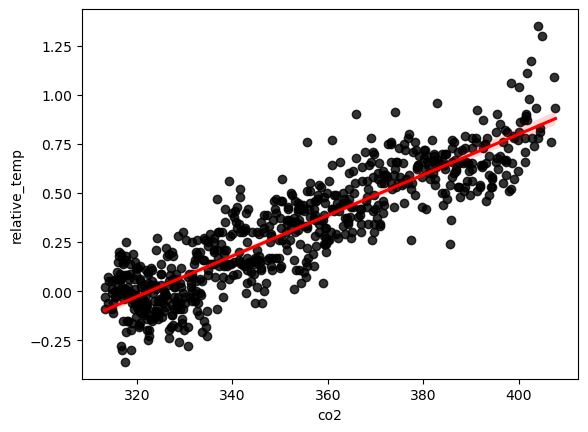

In [21]:
sns.regplot(x='co2', y='relative_temp', data=df, ci=99, line_kws=dict(color="r"), scatter_kws=dict(color='black'))

In [25]:
from statsmodels.formula.api import ols

# Creating and fitting the model
model = ols(formula="co2 ~ relative_temp", data=df).fit()

# Viewing model parameters
model.params

Intercept        328.87540
relative_temp     76.50612
dtype: float64

In [5]:
fish_df = pd.read_csv("../fish.csv")
fish_df.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


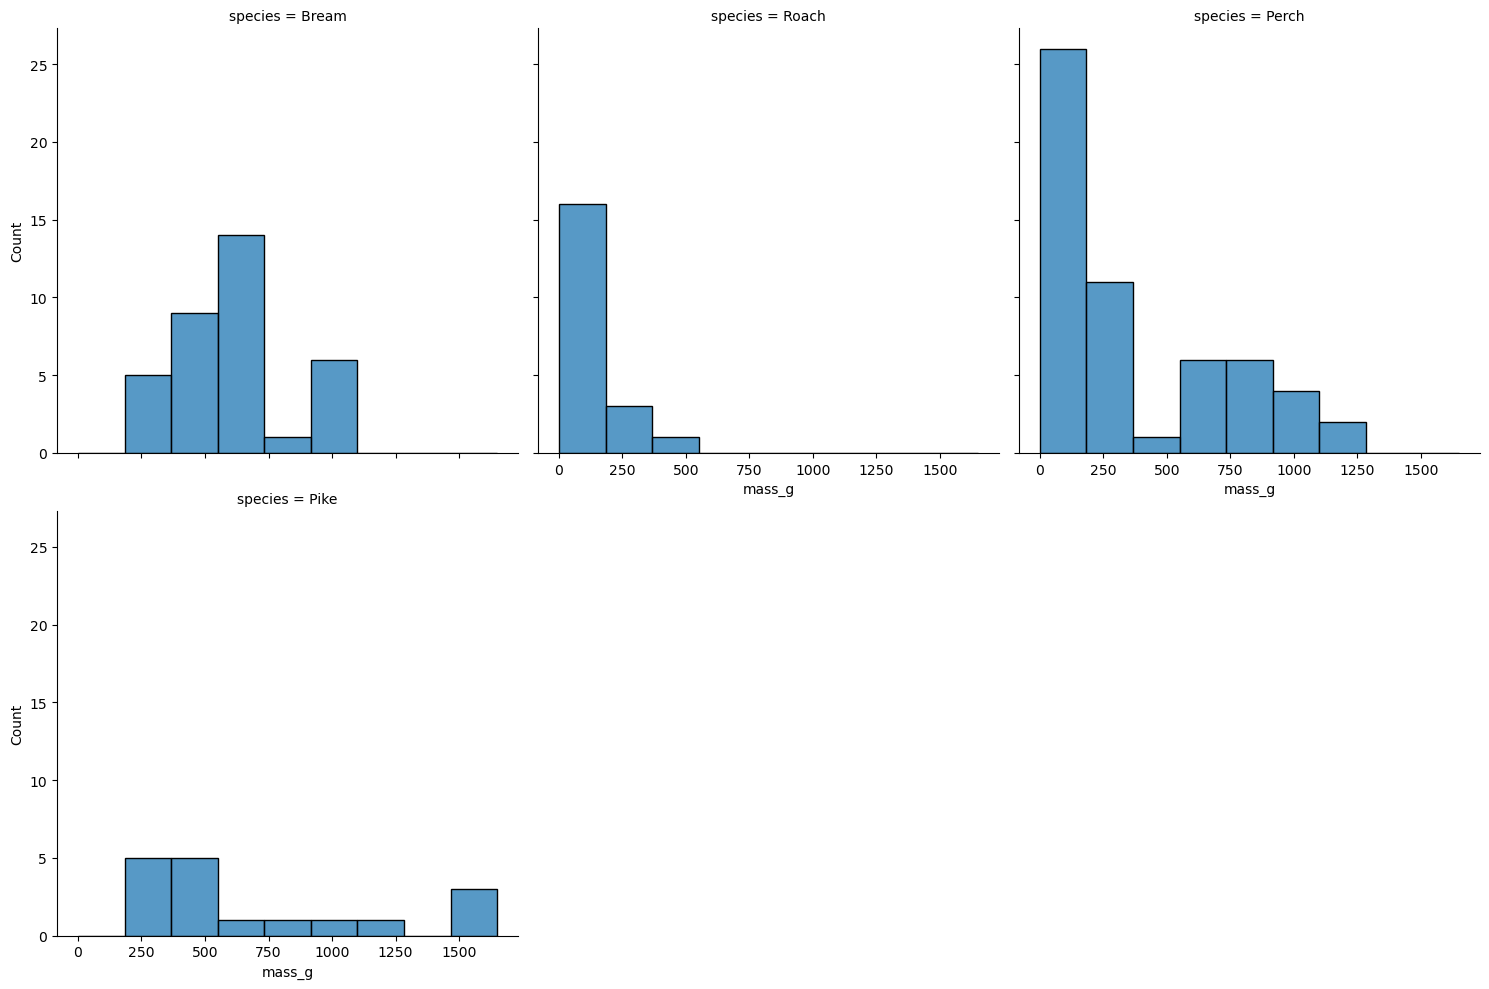

In [8]:
sns.displot(data=fish_df, x='mass_g', col='species', col_wrap=3, bins=9)

In [10]:
fish_df.groupby('species')['mass_g'].mean()


species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

In [13]:
from statsmodels.formula.api import ols

model = ols(formula="mass_g ~ species", data=fish_df).fit()
print(model.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [18]:
model = ols(formula="mass_g ~ species", data=fish_df).fit()
print(model.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [22]:
bream_data = fish_df[fish_df['species'] == 'Bream']
model = ols(formula="mass_g ~ length_cm", data=bream_data).fit()
explanatory_data = pd.DataFrame({
    'length_cm': np.arange(20, 40)
})
predictions = model.predict(explanatory_data)
predictions

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
dtype: float64

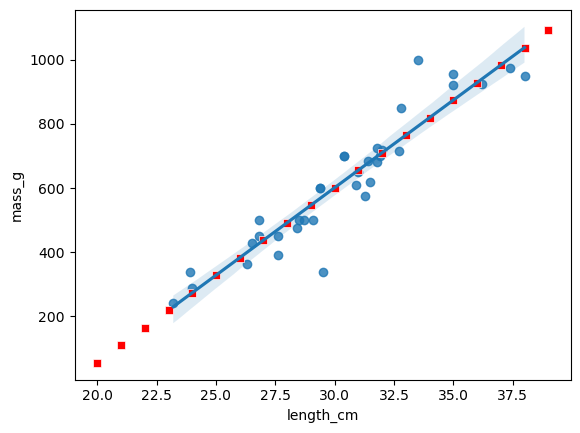

In [28]:
prediction_data = explanatory_data.assign(
    mass_g=model.predict(explanatory_data)
)
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g', data=bream_data)
sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data, color='red', marker='s')
plt.show()



In [27]:
small_bream = pd.DataFrame({'length_cm': [10]})
print(model.predict(small_bream))


0   -489.847756
dtype: float64


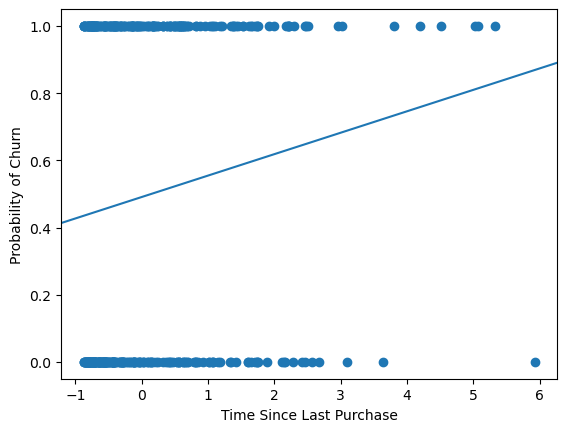

In [5]:
from statsmodels.formula.api import ols
churn_data = pd.read_csv("../data/churn.csv")

# Linear regression example
linear_model = ols('has_churned ~ time_since_last_purchase', data=churn_data).fit()
intercept, slope = linear_model.params

# Plotting linear regression
fig, ax = plt.subplots()
ax.scatter(churn_data['time_since_last_purchase'], churn_data['has_churned'])
plt.axline(xy1=(0, intercept), slope=slope)
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Probability of Churn')
plt.show()


Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


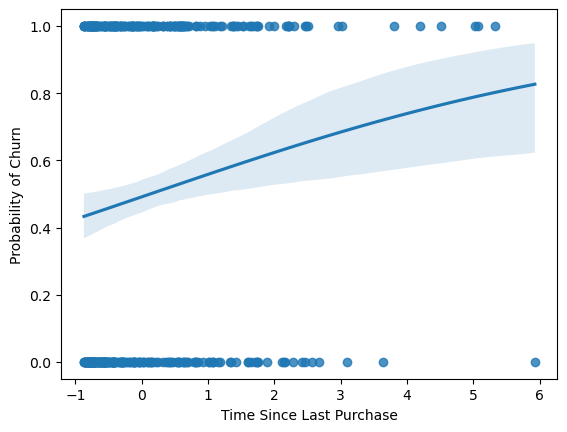

In [6]:
from statsmodels.formula.api import logit

# Fitting logistic regression
logistic_model = logit('has_churned ~ time_since_last_purchase', data=churn_data).fit()

# Plotting logistic regression
fig, ax = plt.subplots()
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn_data, logistic=True)
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Probability of Churn')
plt.show()


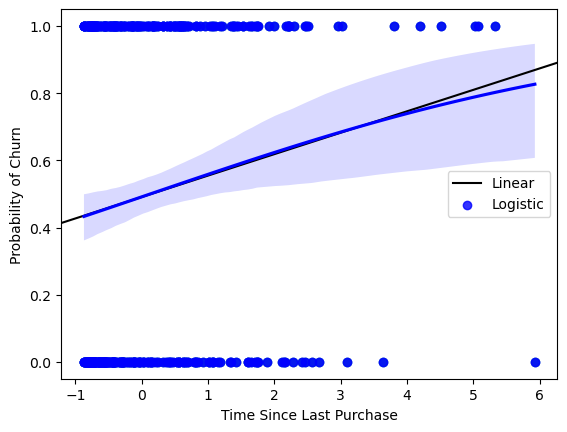

In [9]:
# Plotting both models
fig, ax = plt.subplots()
ax.scatter(churn_data['time_since_last_purchase'], churn_data['has_churned'])
plt.axline(xy1=(0, intercept), slope=slope, color='black', label='Linear')
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn_data, logistic=True, color='blue', label='Logistic')
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Probability of Churn')
ax.legend()
plt.show()


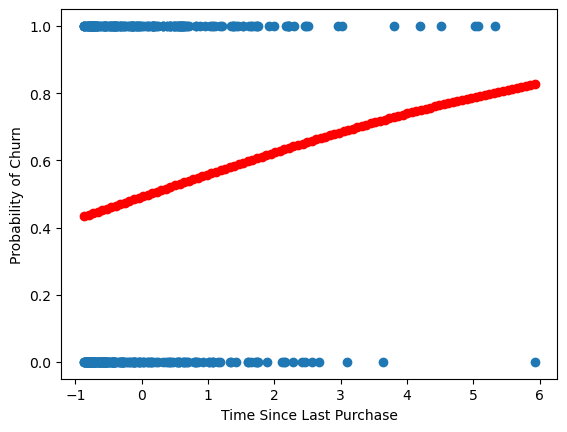

In [10]:
# Create DataFrame with explanatory variable values
prediction_data = pd.DataFrame({'time_since_last_purchase': np.linspace(churn_data['time_since_last_purchase'].min(), churn_data['time_since_last_purchase'].max(), 100)})

# Add predictions
prediction_data['churn_probability'] = logistic_model.predict(prediction_data)

# Plotting predictions
fig, ax = plt.subplots()
ax.scatter(churn_data['time_since_last_purchase'], churn_data['has_churned'])
ax.scatter(prediction_data['time_since_last_purchase'], prediction_data['churn_probability'], color='red')
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Probability of Churn')
plt.show()


In [23]:
prediction_data[prediction_data['churn_probability']>0.5]

,time_since_last_purchase,churn_probability,odds_ratio,log_odds_ratio
15,0.159471,0.501978,1.007944,0.007913
16,0.228147,0.506600,1.026753,0.026401
17,0.296823,0.511221,1.045912,0.044890
18,0.365499,0.515839,1.065430,0.063378
19,0.434175,0.520455,1.085311,0.081867
...,...,...,...,...
95,5.653538,0.815627,4.423794,1.486998
96,5.722214,0.818391,4.506344,1.505486
97,5.790890,0.821123,4.590435,1.523975
98,5.859566,0.823823,4.676095,1.542463


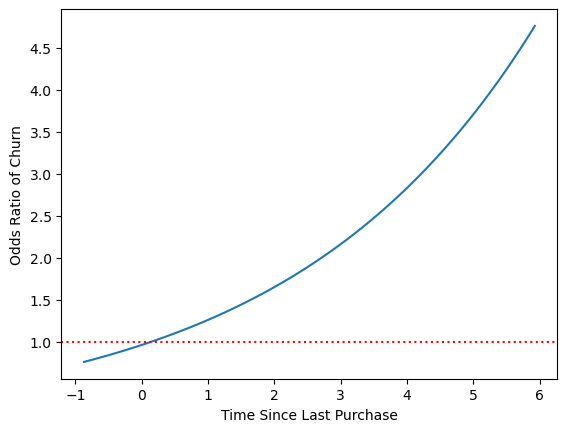

In [17]:
prediction_data['odds_ratio'] = prediction_data['churn_probability'] / (1 - prediction_data['churn_probability'])

# Plotting odds ratio
fig, ax = plt.subplots()
sns.lineplot(x='time_since_last_purchase', y='odds_ratio', data=prediction_data)
plt.axhline(y=1, linestyle=':', color='red')
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Odds Ratio of Churn')
plt.show()


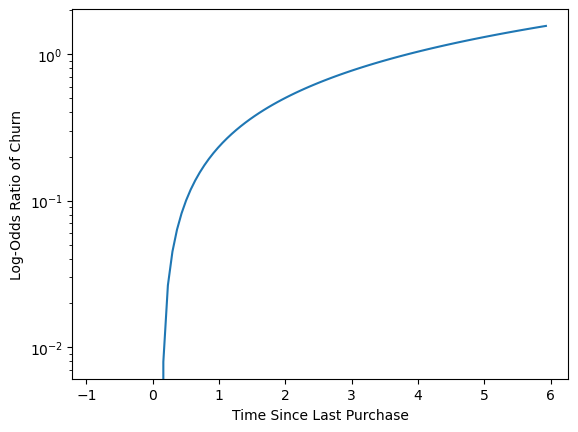

In [21]:
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

# Plotting log-odds ratio
fig, ax = plt.subplots()
sns.lineplot(x='time_since_last_purchase', y='log_odds_ratio', data=prediction_data)
ax.set_xlabel('Time Since Last Purchase')
ax.set_ylabel('Log-Odds Ratio of Churn')
ax.set_yscale('log')
plt.show()


In [22]:
prediction_data

,time_since_last_purchase,churn_probability,odds_ratio,log_odds_ratio
0,-0.870666,0.433051,0.763826,-0.269416
1,-0.801991,0.437595,0.778079,-0.250927
2,-0.733315,0.442151,0.792598,-0.232439
3,-0.664639,0.446716,0.807389,-0.213950
4,-0.595963,0.451290,0.822455,-0.195462
...,...,...,...,...
95,5.653538,0.815627,4.423794,1.486998
96,5.722214,0.818391,4.506344,1.505486
97,5.790890,0.821123,4.590435,1.523975
98,5.859566,0.823823,4.676095,1.542463
